# Bank Customer Segmentation

## Importing Libraries

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')

## Data Ingestion

In [2]:
bank_cust = pd.read_csv('bank_transactions.csv')
bank_cust.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


## Data Understanding

In [3]:
bank_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [4]:
bank_cust.describe().round(2)

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1048567.00,1048567.00
mean,1.154035e+05,157087.53,1574.34
std,8.464854e+05,51261.85,6574.74
min,0.000000e+00,0.00,0.00
25%,4.721760e+03,124030.00,161.00
50%,1.679218e+04,164226.00,459.03
75%,5.765736e+04,200010.00,1200.00
max,1.150355e+08,235959.00,1560034.99


## Exploratory Data Analysis

In [5]:
bank_eda = bank_cust.copy()

### Any duplicated values?

In [6]:
print(f'Number of Duplicate Values: {bank_eda.duplicated().sum()}')

Number of Duplicate Values: 0


### Any NULL values?

In [7]:
print("Number of Null Values in the dataset:")
print(bank_eda.isna().sum())

Number of Null Values in the dataset:
TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64


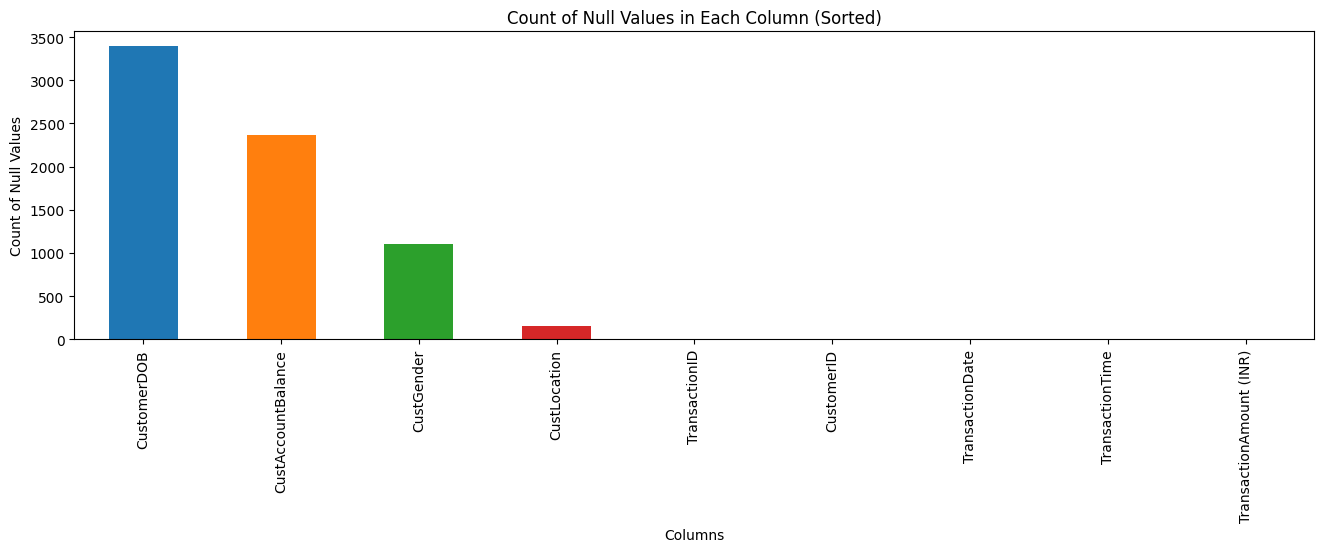

In [10]:
null_values_sorted = bank_eda.isna().sum().sort_values(ascending= False)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.figure(figsize=(16, 4))
null_values_sorted.plot(kind='bar', color=colors)
plt.xlabel('Columns')
plt.ylabel('Count of Null Values')
plt.title('Count of Null Values in Each Column (Sorted)')
plt.show()

### Counts of Categorical values?

In [11]:
bank_eda.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


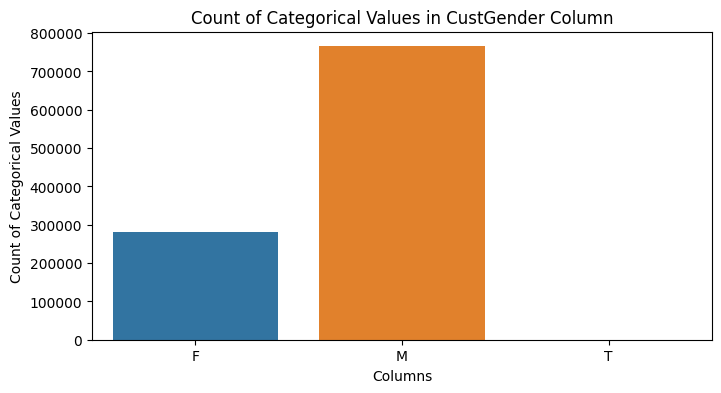

In [12]:
plt.figure(figsize=(8, 4))
sns.countplot(data=bank_eda,x='CustGender')
plt.xlabel('Columns')
plt.ylabel('Count of Categorical Values')
plt.title('Count of Categorical Values in CustGender Column')
plt.show()

In [13]:
print(bank_eda['CustLocation'].value_counts())

MUMBAI                         103595
NEW DELHI                       84928
BANGALORE                       81555
GURGAON                         73818
DELHI                           71019
                                ...  
ROAD (E) THANE                      1
TO APOLO PHARMACY BANGALORE         1
PILLAR NO 725 NEW DELHI             1
COMPANY BANGALORE                   1
IMPERIA THANE WEST                  1
Name: CustLocation, Length: 9355, dtype: int64


### Boxplot for Numerical Columns

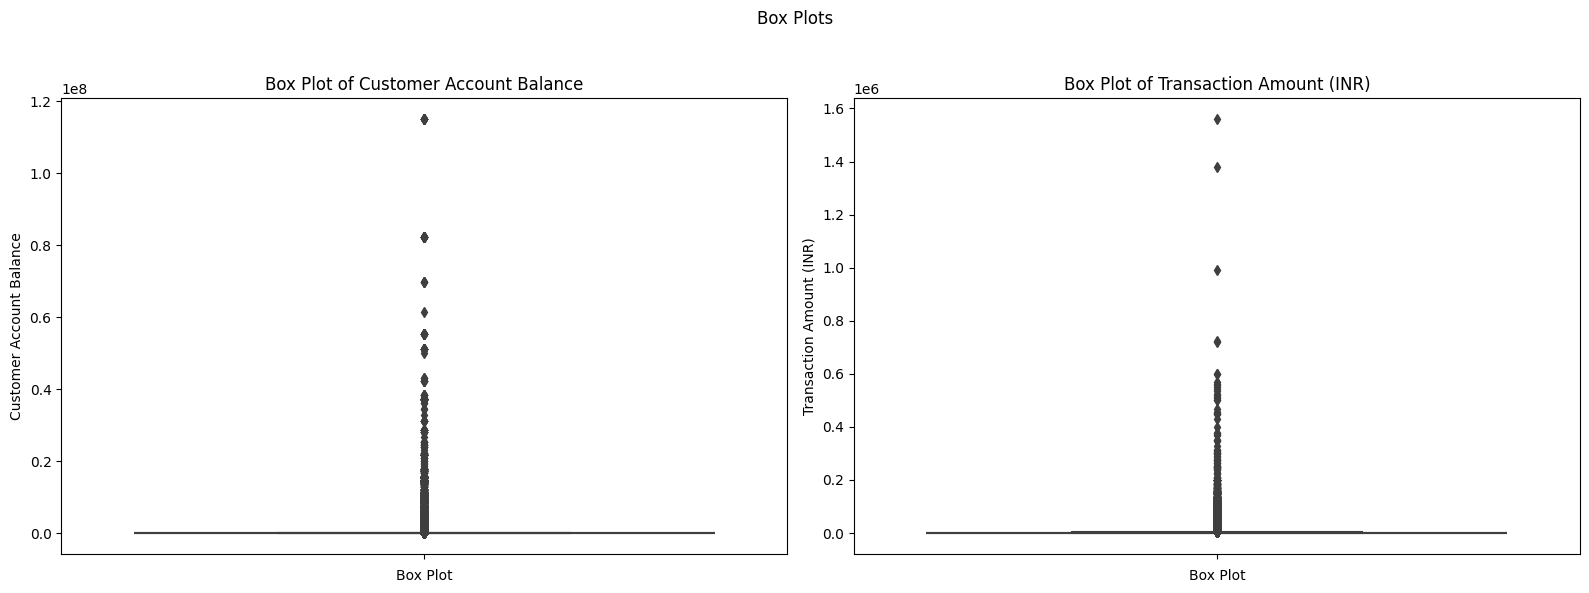

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(data=bank_eda, y='CustAccountBalance', ax=axes[0])
axes[0].set_xlabel('Box Plot')
axes[0].set_ylabel('Customer Account Balance')
axes[0].set_title('Box Plot of Customer Account Balance')

sns.boxplot(data=bank_eda, y='TransactionAmount (INR)', ax=axes[1])
axes[1].set_xlabel('Box Plot')
axes[1].set_ylabel('Transaction Amount (INR)')
axes[1].set_title('Box Plot of Transaction Amount (INR)')

plt.suptitle('Box Plots')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Boxplot of Account Balance and Transaction Amount by Gender

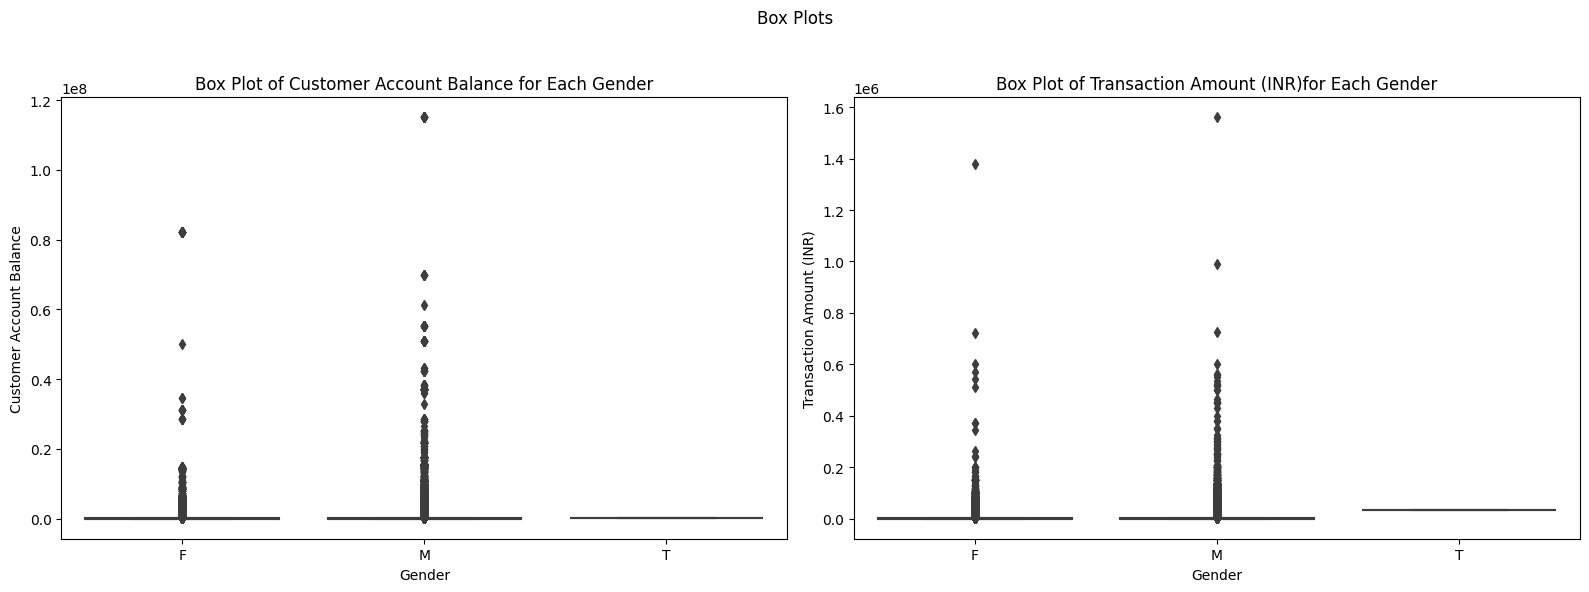

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(data=bank_eda,x='CustGender', y='CustAccountBalance', ax=axes[0])
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Customer Account Balance')
axes[0].set_title('Box Plot of Customer Account Balance for Each Gender')

sns.boxplot(data=bank_eda,x='CustGender', y='TransactionAmount (INR)', ax=axes[1])
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Transaction Amount (INR)')
axes[1].set_title('Box Plot of Transaction Amount (INR)for Each Gender')

plt.suptitle('Box Plots')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [16]:
bank_eda['CustLocation'].value_counts().sort_values(ascending=False).iloc[:10]

MUMBAI       103595
NEW DELHI     84928
BANGALORE     81555
GURGAON       73818
DELHI         71019
NOIDA         32784
CHENNAI       30009
PUNE          25851
HYDERABAD     23049
THANE         21505
Name: CustLocation, dtype: int64

### Year of Transaction and Customer Age as per Transaction Year

In [18]:
from datetime import datetime,date

bank_eda['TransactionDate'] = pd.to_datetime(bank_eda['TransactionDate'])
bank_eda['TransactionDate'] = bank_eda['TransactionDate'].apply(lambda x: x - pd.DateOffset(years=100) if x > datetime.now() else x)

In [19]:
bank_eda.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5


In [20]:
bank_eda['TransactionYear'] = bank_eda['TransactionDate'].dt.year
bank_eda.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,2016
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,2016
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2016-02-08,142712,459.0,2016
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,2016
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,2016


In [22]:
bank_eda['CustomerDOB'] = pd.to_datetime(bank_eda['CustomerDOB'])
bank_eda['CustomerDOB'] = bank_eda['CustomerDOB'].apply(lambda x: x - pd.DateOffset(years=100) if x > datetime.now() else x)
bank_eda['CustomerYear'] = bank_eda['CustomerDOB'].dt.year
bank_eda.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear,CustomerYear
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,2016,1994.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,2016,1957.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,2016,1996.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,2016,1973.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,2016,1988.0


In [23]:
bank_eda['CustomerAge'] = bank_eda['TransactionYear'] - bank_eda['CustomerYear']
bank_eda.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear,CustomerYear,CustomerAge
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,2016,1994.0,22.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,2016,1957.0,59.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,2016,1996.0,20.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,2016,1973.0,43.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,2016,1988.0,28.0


In [24]:
bank_eda[bank_eda.CustomerAge > 200]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear,CustomerYear,CustomerAge
16,T17,C1376215,1800-01-01,M,MUMBAI,77495.15,2016-01-08,124727,1423.11,2016,1800.0,216.0
22,T23,C7018081,1800-01-01,M,WAYS PANCHKUVA AHMEDABAD,143.07,2016-03-08,104718,110.00,2016,1800.0,216.0
28,T29,C7935438,1800-01-01,M,MOHALI,969436.12,2016-03-08,183634,36.90,2016,1800.0,216.0
35,T36,C1211387,1800-01-01,M,AHMEDABAD,11791.25,2016-03-08,125915,1075.00,2016,1800.0,216.0
151,T152,C3334638,1800-01-01,M,PUNE,700.00,2016-09-08,24912,1500.00,2016,1800.0,216.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1048443,T1048444,C7261226,1800-01-01,M,BHILAI,1393.33,2016-09-18,102427,200.00,2016,1800.0,216.0
1048452,T1048453,C3813481,1800-01-01,M,NEW DELHI,984605.24,2016-09-18,84644,219.00,2016,1800.0,216.0
1048531,T1048532,C6937679,1800-01-01,M,NEW DELHI,50698.90,2016-09-18,184319,598.86,2016,1800.0,216.0
1048533,T1048534,C7431884,1800-01-01,M,MANDIR DHANBAD,53771.64,2016-09-18,184049,520.00,2016,1800.0,216.0


### Outliers!?

In [25]:
bank_eda.drop('CustomerDOB',axis=1,inplace=True)
bank_eda.drop('CustomerYear',axis=1,inplace=True)

### Looks like there are Outliers

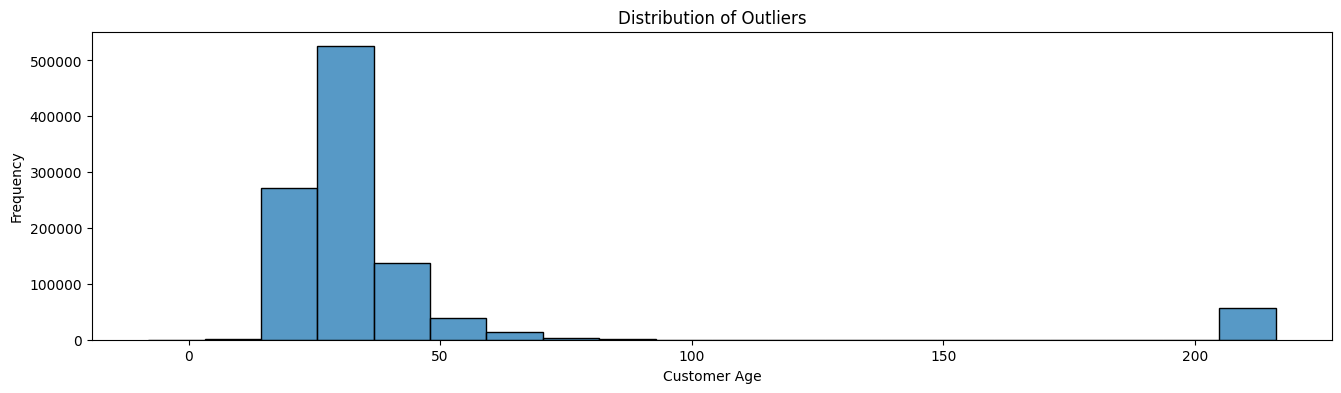

In [28]:
plt.figure(figsize=(16, 4))
sns.histplot(data=bank_eda,x='CustomerAge',bins=20)
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.title('Distribution of Outliers')
plt.show()

In [29]:
bank_eda[bank_eda.CustomerAge > 200]

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear,CustomerAge
16,T17,C1376215,M,MUMBAI,77495.15,2016-01-08,124727,1423.11,2016,216.0
22,T23,C7018081,M,WAYS PANCHKUVA AHMEDABAD,143.07,2016-03-08,104718,110.00,2016,216.0
28,T29,C7935438,M,MOHALI,969436.12,2016-03-08,183634,36.90,2016,216.0
35,T36,C1211387,M,AHMEDABAD,11791.25,2016-03-08,125915,1075.00,2016,216.0
151,T152,C3334638,M,PUNE,700.00,2016-09-08,24912,1500.00,2016,216.0
...,...,...,...,...,...,...,...,...,...,...
1048443,T1048444,C7261226,M,BHILAI,1393.33,2016-09-18,102427,200.00,2016,216.0
1048452,T1048453,C3813481,M,NEW DELHI,984605.24,2016-09-18,84644,219.00,2016,216.0
1048531,T1048532,C6937679,M,NEW DELHI,50698.90,2016-09-18,184319,598.86,2016,216.0
1048533,T1048534,C7431884,M,MANDIR DHANBAD,53771.64,2016-09-18,184049,520.00,2016,216.0


In [30]:
bank_clean = bank_eda[bank_eda.CustomerAge < 100]

Removed the outliers

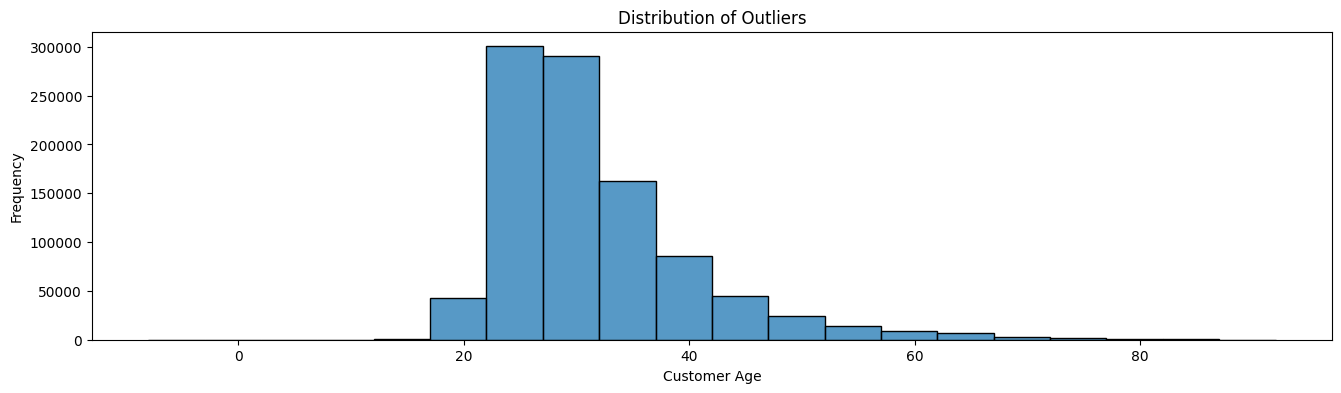

In [31]:
plt.figure(figsize=(16, 4))
sns.histplot(data=bank_clean,x='CustomerAge',bins=20)
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.title('Distribution of Outliers')
plt.show()

Majority customers are in the age group of 20-40

In [36]:
print("Number of null values in the dataset:")
print(bank_clean.isna().sum())

Number of null values in the dataset:
TransactionID                 0
CustomerID                    0
CustGender                  164
CustLocation                151
CustAccountBalance         2194
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
TransactionYear               0
CustomerAge                   0
dtype: int64


### Checking if Account Balance > Transaction Amount

In [34]:
bank_clean[(bank_clean['CustAccountBalance'] - bank_clean['TransactionAmount (INR)'])<0]

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear,CustomerAge
1,T2,C2142763,M,JHAJJAR,2270.69,2016-02-08,141858,27999.00,2016,59.0
26,T27,C5430368,M,DELHI,285.76,2016-03-08,160537,5500.00,2016,30.0
34,T35,C7017047,M,GURGAON,39.73,2016-03-08,182715,110.00,2016,39.0
36,T37,C4320949,F,CHENNAI,213.06,2016-03-08,182915,1081.00,2016,32.0
46,T47,C8934588,M,JAIPUR,5055.18,2016-03-08,223146,13846.00,2016,35.0
...,...,...,...,...,...,...,...,...,...,...
1048537,T1048538,C9016563,M,SHILLLONG,1002.96,2016-09-18,183747,1146.65,2016,29.0
1048538,T1048539,C3319123,M,DELHI,200.62,2016-09-18,183920,401.20,2016,37.0
1048542,T1048543,C6210667,M,MALDA,6.42,2016-09-18,182855,800.00,2016,27.0
1048560,T1048561,C5028150,M,PUNE,464.87,2016-09-18,184632,3000.00,2016,36.0


In [35]:
bank_clean_2 = bank_clean[(bank_clean['CustAccountBalance'] - bank_clean['TransactionAmount (INR)'])>0]

In [38]:
print("Number of null values in the dataset:")
print(bank_clean_2.isna().sum())

Number of null values in the dataset:
TransactionID                0
CustomerID                   0
CustGender                 135
CustLocation               140
CustAccountBalance           0
TransactionDate              0
TransactionTime              0
TransactionAmount (INR)      0
TransactionYear              0
CustomerAge                  0
dtype: int64


In [39]:
bank_clean_2['CustGender'].fillna('M',inplace=True)
bank_clean_2['CustLocation'].fillna('MUMBAI',inplace=True)

In [40]:
print("Number of null values in the dataset:")
print(bank_clean_2.isna().sum())

Number of null values in the dataset:
TransactionID              0
CustomerID                 0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
TransactionYear            0
CustomerAge                0
dtype: int64


### Transactions Amount and Transaction Count by Month -2016

In [41]:
bank_clean_2['TransactionMonth'] = bank_clean_2['TransactionDate'].dt.month
bank_clean_2.head()

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear,CustomerAge,TransactionMonth
0,T1,C5841053,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,2016,22.0,2
2,T3,C4417068,F,MUMBAI,17874.44,2016-02-08,142712,459.0,2016,20.0,2
3,T4,C5342380,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,2016,43.0,2
4,T5,C9031234,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,2016,28.0,2
5,T6,C1536588,F,ITANAGAR,53609.20,2016-02-08,173940,676.0,2016,44.0,2


In [43]:
transactions_num = bank_clean_2[['TransactionAmount (INR)','TransactionMonth']]
monthly_transactions = transactions_num.groupby('TransactionMonth').agg(['median','count'])
monthly_transactions

TransactionAmount (INR)        
                                  median   count
TransactionMonth                                
1                                384.000   36129
2                                400.000   36994
3                                477.975   40108
4                                500.000   40644
5                                415.000   36124
6                                454.000   39217
7                                480.000   41656
8                                400.000  362838
9                                378.000  135155
10                               433.000   43455
11                               465.000   40296
12                               396.650   36204

### Median Transaction Amount by Month

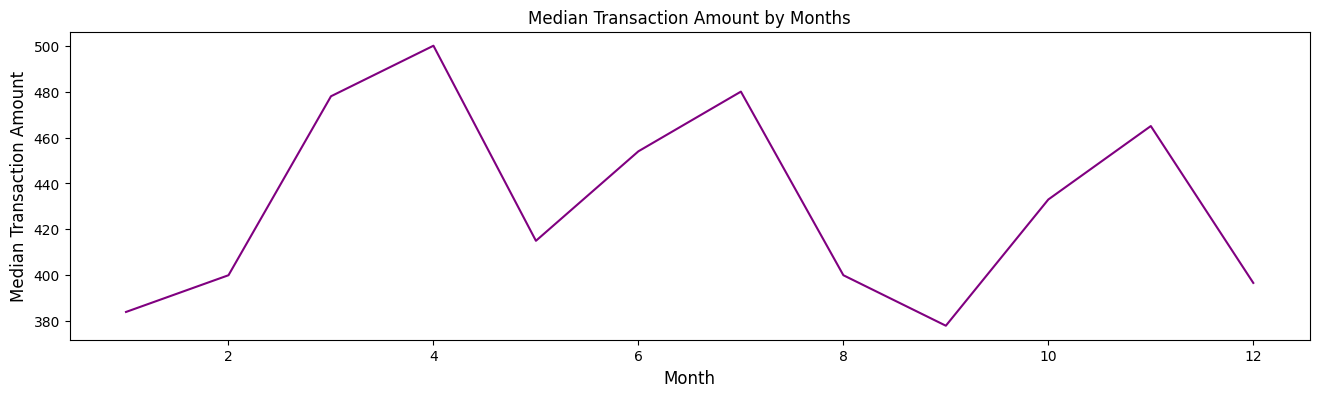

In [57]:
plt.figure(figsize=(16,4))
monthly_transactions['TransactionAmount (INR)','median'].plot(kind='line', color = "purple")
plt.title('Median Transaction Amount by Months')
plt.xlabel('Month', fontsize=12, color='black')
plt.ylabel('Median Transaction Amount', fontsize=12, color='black')
plt.xticks(color='black', fontsize=10)
plt.yticks(color='black', fontsize=10)
plt.show()